In [36]:
import pandas as pd
import seaborn as sns

In [37]:
df = pd.read_csv("titanic.csv")

In [38]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [39]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
Sex_counts = df['Sex'].value_counts()

In [41]:
print(Sex_counts)

male      577
female    314
Name: Sex, dtype: int64


In [42]:
row_index = 5

In [43]:
specific_row = df.iloc[row_index]

In [44]:
print(specific_row)

PassengerId                   6
Survived                      0
Pclass                        3
Name           Moran, Mr. James
Sex                        male
Age                         NaN
SibSp                         0
Parch                         0
Ticket                   330877
Fare                     8.4583
Cabin                       NaN
Embarked                      Q
Name: 5, dtype: object


In [45]:
df.at[5, 'Age'] = 28

In [46]:
adults = df[df['Age'] > 18]

In [47]:
number_of_adults = len(adults)

In [48]:
print(f'There are {number_of_adults} people over the age of 18.')

There are 576 people over the age of 18.


In [49]:
print((df[df['Sex'] == 'male'].shape[0]/len(df))*100)

64.75869809203144


In [50]:
pclass_frequencies = df['Pclass'].value_counts()
print(pclass_frequencies)

3    491
1    216
2    184
Name: Pclass, dtype: int64


In [51]:
class_counts = df['Pclass'].value_counts(normalize=True)
relative_frequencies = class_counts * 100

In [52]:
print(relative_frequencies)

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


In [53]:
df[df['PassengerId'] == 528]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S


In [54]:
survival_counts = df.groupby(['Sex', 'Survived']).size().unstack()

In [55]:
print(survival_counts)

Survived    0    1
Sex               
female     81  233
male      468  109


In [56]:
maleSurvive = 0
femaleSurvive = 0
maleDied = 0
femaleDied = 0
for idx in range(len(df)):
    if df.loc[idx]["Sex"] == "male" and df.loc[idx]["Survived"] == 0:
        maleDied +=1
    elif df.loc[idx]["Sex"] == "male" and df.loc[idx]["Survived"] == 1:
        maleSurvive +=1
    elif df.loc[idx]["Sex"] == "female" and df.loc[idx]["Survived"] == 0:
        femaleDied +=1
    elif df.loc[idx]["Sex"] == "female" and df.loc[idx]["Survived"] == 1:
        femaleSurvive +=1
conTable = pd.DataFrame({
    "Male": [maleSurvive, maleDied],
    "Female": [femaleSurvive, femaleDied]
})
conTable.index = ["Survived", "Died"]
conTable.head()

,Male,Female
Survived,109,233
Died,468,81


In [57]:
survived = {"S": 0, "C": 0, "Q": 0, "U": 0}
died = {"S": 0, "C": 0, "Q": 0, "U": 0}
for idx in range(len(df)):
    city = df.loc[idx]["Embarked"]
    if df.loc[idx]["Survived"] == 1:
        if city in ["S", "C", "Q"]:
            survived[city] += 1
        else:
            survived["U"] += 1
    else:
        if city in ["S", "C", "Q"]:
            died[city] += 1
        else:
            died["U"] += 1
conTable = {
    "S": [survived["S"], died["S"], survived["S"] + died["S"]],
    "C": [survived["C"], died["C"], survived["C"] + died["C"]],
    "Q": [survived["Q"], died["Q"], survived["Q"] + died["Q"]],
    "U": [survived["U"], died["U"], survived["U"] + died["U"]],
    "Total": [survived["S"] + survived["Q"] + survived["C"] + survived["U"], 
    died["S"] + died["Q"] + died["C"] + died["U"],
    len(df)]

}
conTable = pd.DataFrame(conTable)
conTable.index = ["Survived", "Died", "total"]
conTable.head()

,S,C,Q,U,Total
Survived,217,93,30,2,342
Died,427,75,47,0,549
total,644,168,77,2,891


In [59]:
passengerClasses = {"First": 0, "Second": 0, "Third": 0}
for passenger in df["Pclass"]:
    if passenger == 1:
        passengerClasses["First"] += 1
    elif passenger == 2:
        passengerClasses["Second"] += 1
    elif passenger == 3:
        passengerClasses["Third"] += 1
percentClasses = {"First": (passengerClasses["First"]/len(df))*100,
                 "Second": (passengerClasses["Second"]/len(df)*100),
                 "Third": (passengerClasses["Third"]/len(df)*100)
                 }
freqTable = {
    "Classes": ["First", "Second", "Third"],
    "Percent": [percentClasses["First"], 
                percentClasses["Second"],
                percentClasses["Third"]]
}
freqTable = pd.DataFrame(freqTable)
freqTable.head()

,Classes,Percent
0,First,24.242424
1,Second,20.650954
2,Third,55.106622


<AxesSubplot:xlabel='Classes', ylabel='Percent'>

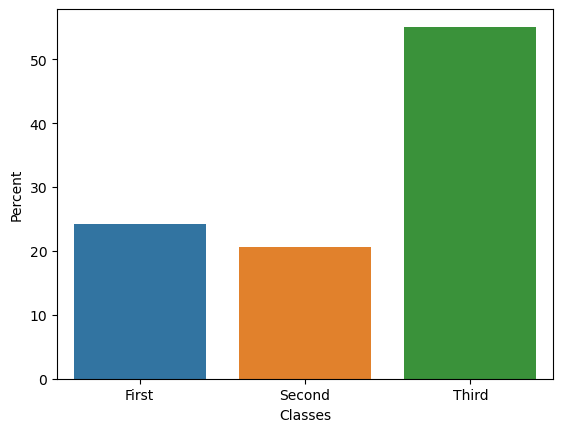

In [60]:
sns.barplot(data=freqTable, x="Classes", y="Percent")